In [14]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
# from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings("ignore")



# Case study..
From equity bank was hit by 2.1 million USD debit card fraud.

Here the "card not present" scam was used to steal from the victims. This uses stolen card details to shop online, the fraudsters often create websites for accessing the funds in those cards.

These transactions are done in batches since most of the banks requires customers to disclose their information.

Kenyan Banks lose about USD 130 million to cyber criminals yearly mostly through;
loan stacking ... practice of getting approval for multiple loans or credits simultaneously within a very short period
Identity theft 

# Here are the Objectives..
1. Classify whether a transactions is fraudulent or non-fraudulent using patterns from historical data

2. Identify unusual transactions patterns that may signal fraudulent activities, checking for outliers within the transactions.

3. Train machine learning model which predicts fraudulent transactions based on historical data.

4. Study how demographics including age and gender impact fraud risks.

5. Identify peak fraud periods based on transactions date and transactions time.

In [3]:
data = pd.read_csv("Bank_Transaction_Fraud_Detection.csv")
data.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [4]:
data.isna().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [5]:
# check the shape of the dataset
print("Shape of the dataset:", data.shape)


Shape of the dataset: (200000, 24)


In [ ]:
# Here check for the column name and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [ ]:
# Summary statistics for numerical columns
print(data.describe())

# Summary statistics for categorical columns
print(data.describe(include='object'))

In [7]:
# check for the summary statistics for the numerical columns
print(data.describe())

                 Age  Transaction_Amount  Account_Balance       Is_Fraud
count  200000.000000       200000.000000    200000.000000  200000.000000
mean       44.015110        49538.015554     52437.988784       0.050440
std        15.288774        28551.874004     27399.507128       0.218852
min        18.000000           10.290000      5000.820000       0.000000
25%        31.000000        24851.345000     28742.395000       0.000000
50%        44.000000        49502.440000     52372.555000       0.000000
75%        57.000000        74314.625000     76147.670000       0.000000
max        70.000000        98999.980000     99999.950000       1.000000


In [9]:
# get the summary statistics for categorical columns
data.describe(include = object)

,Customer_ID,Customer_Name,Gender,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,Transaction_Time,Merchant_ID,Transaction_Type,Merchant_Category,Transaction_Device,Transaction_Location,Device_Type,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,200000,142699,2,34,145,145,3,200000,31,77856,200000,5,6,20,148,4,1,9000,172,4779
top,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Aahana Kala,Male,Nagaland,Chandigarh,Chandigarh Branch,Checking,4fa3208f-9e23-42dc-b330-844829d0c12c,29-01-2025,07:30:31,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Credit,Restaurant,Self-service Banking Machine,"Kavaratti, Lakshadweep",POS,INR,+9191471XXXXXX,Sports ticket,krishnaXXX@XXXXX.com
freq,1,8,100452,6031,8135,8135,66924,1,6854,11,1,40180,33525,21707,5954,50111,200000,41,1268,99


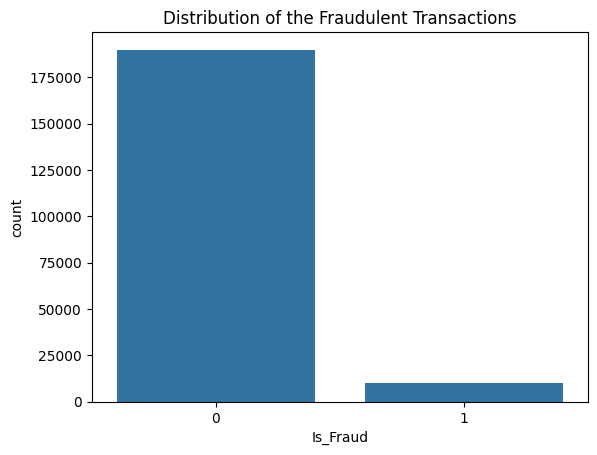

In [15]:
# Analyzing the target variable by checking distribution 
data["Is_Fraud"].value_counts(normalize = True)

# visualizing the distribution
sns.countplot(x = "Is_Fraud", data = data)
plt.title("Distribution of the Fraudulent Transactions")
plt.show()

In [ ]:
# Boxplots for numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()